## Table of Contents
- [Import libraries](#1)
- [Download tables](#2)
- [Process tables](#3)
- [Download plots](#4)
- [Download plots with log10](#5)

<a name='1'></a>
## Import libraries

The script is focused on setting up an environment for data analysis and visualization. It imports a suite of libraries and modules that are essential for statistical computing, data manipulation, progress tracking, file system operations, and generating visualizations such as plots and Venn diagrams. The specific libraries imported include pandas for data structures, numpy for numerical operations, tqdm for progress bars, glob for file path retrieval, os for operating system interaction, matplotlib and seaborn for plotting and graphical representations, and matplotlib_venn for creating Venn diagrams.

Additionally, the script modifies the system path to include a custom directory, which suggests that the script will use additional custom modules and configuration settings located in this directory. These custom modules, imported with wildcard imports (from config import * and from functions import *)

In [1]:
# %load /cluster/home/myurchikova/github/projects2020_ohsu/eth/learning_Master_thesis/TASKS/func/base_imports.py
import pandas as pd
import numpy as np
import tqdm 
import glob
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import tarfile
import re
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
import sys
from matplotlib.ticker import ScalarFormatter
sys.path.append(r"/cluster/home/prelotla/github/projects2020_ohsu/eth/MY_Master_thesis_rerun_LP/TASKS/func/")
%load_ext autoreload
%autoreload 2
from config import *
from functions import *
import time
import pathlib

Matplotlib created a temporary config/cache directory at /scratch/slurm-job.5039281/matplotlib-1bhppee7 because the default path (/cluster/customapps/biomed/grlab/users/prelotla/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
OHSU_BRCA_NEW = True

<a name='2'></a>
## Download tables

out_df_original is loaded from a CSV file, with the path constructed from a combination of constants and variables that likely point to a specific directory and file name. The file is tab-separated (indicated by sep="\t").
out_df_filtered is similarly loaded from another CSV file located at a constructed path. This file uses a different separator (indicated by sep=";"), which suggests that the format of this CSV might be different from the first one, possibly following a standard CSV convention.

In [3]:
# Loading data
out_df_original = pd.read_csv(f'{SAVE_DIR}/{DIR_CSV}/{DIR_BRCA}/{NAME_TABLES}/{NAME_NON_FILTERING_BRCA}', sep="\t")
out_df_filtered = pd.read_csv(f'{SAVE_DIR}/{DIR_CSV}/{DIR_BRCA}/{NAME_TABLES}/OHSU_BRCA_NEW/{NAME_FILTERING_BRCA}', sep=";")

<a name='3'></a>
## Process tables

It updates the configuration parameters of the matplotlib library to set the font size. The command matplotlib.rcParams.update({'font.size': 4}) modifies the default settings for the font size to 4. This affects all subsequent plots created using matplotlib where no other font size is specified.
It imports the math module, which provides access to higher-level mathematical functions and constants. This is a standard Python module commonly used for performing mathematical calculations.

In [4]:
# Import requirements for fonts
import matplotlib
matplotlib.rcParams.update({'font.size':4})
import math

Renaming columns in out_df_original DataFrame, which suggests a re-structuring of the data to ensure consistency or clarity in the dataset.
Assigning out_df_filtered to first_df and out_df_original to second_df, and then setting final_df to first_df, which indicates that final_df will be used for further operations as a primary DataFrame.
Inserting a new column 'sum' into out_df_filtered at the fourth position (index 3), with values computed by summing up other specified columns. This operation is common when you want to create a summary statistic within your dataset.
Using conditional logic to determine the file path where final_df will be saved. The path changes depending on whether a certain condition (OHSU_BRCA_NEW) is True or False.
Writing the final_df DataFrame to a CSV file using the to_csv method, with headers and a tab separator.

In [5]:
# Processing tables & save tables
out_df_original.rename(columns={'inter':'size_intersection',
                                'eth_without_ohsu':'size_eth\ohsu',
                                'ohsu_without_eth':'size_ohsu\eth'},inplace=True)
first_df=out_df_filtered
second_df=out_df_original
final_df = first_df

# Adding sum for simple filtration
out_df_filtered.insert(loc=4,column='sum',value=final_df['size_intersection']+final_df['size_ohsu\eth']+final_df['size_eth\ohsu'])
out_df_filtered.head()
if not OHSU_BRCA_NEW:
    final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,NAME_FINAL_BRCA])
if OHSU_BRCA_NEW:
    final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,'OHSU_BRCA_NEW',NAME_FINAL_BRCA])

final_df.to_csv(final_path,header=True,sep='\t')

<a name='4'></a>
## Plotting data

Data Selection and Renaming: Columns in data tables are renamed for consistency and clarity, and DataFrames are assigned to new variables for subsequent operations.
Conditional File Path Creation: Depending on a condition, file paths for saving the data are generated, indicating a system that adapts to different data versions or stages of processing.
Data Export: The prepared DataFrame is exported to a CSV file, using tab separation, suggesting the output is formatted for specific requirements or further analysis.
Data Loop Processing: The script processes data for each sample within a set, performing steps such as aggregation and sorting, tailored to the analysis needs.
Visualization Data Structuring: Data is organized into structures suitable for visualization, such as vectors representing categories or conditions.
Graphical Representation: Custom plotting functions are employed to create visual representations of the data, like bar plots, facilitating the interpretation and comparison of the results.

Choose right filter
Choose right filter


<Figure size 640x480 with 0 Axes>

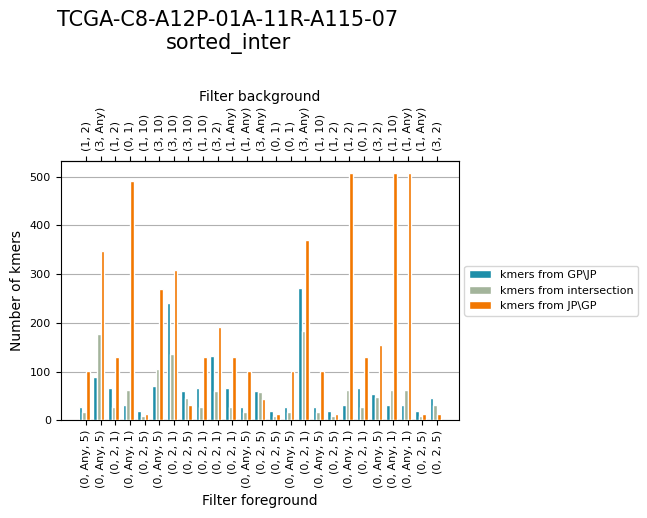

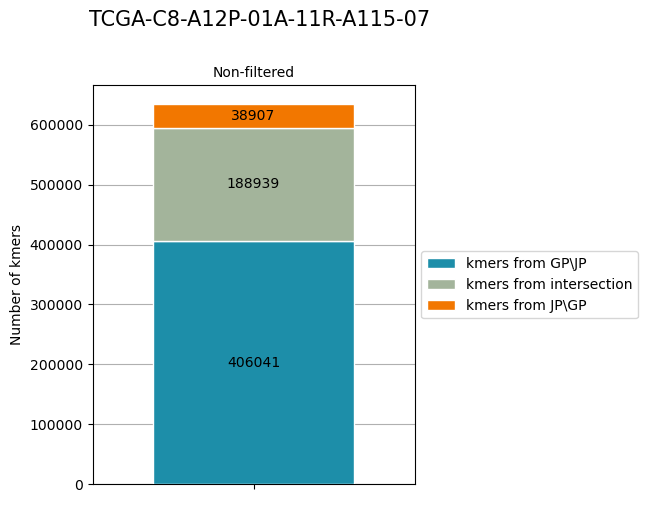

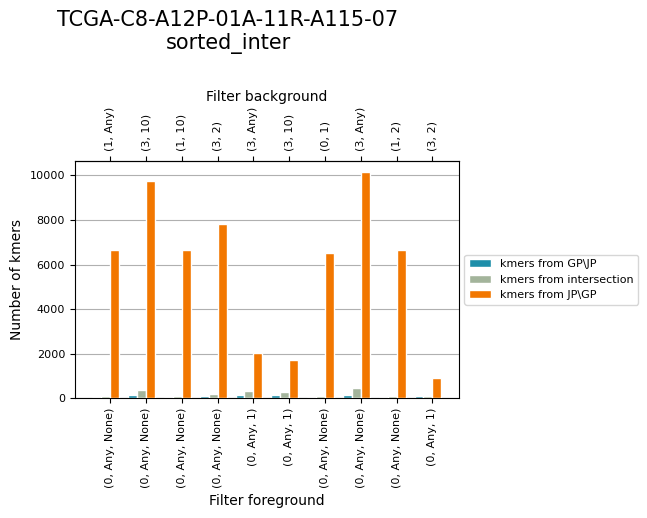

Choose right filter
Choose right filter


<Figure size 640x480 with 0 Axes>

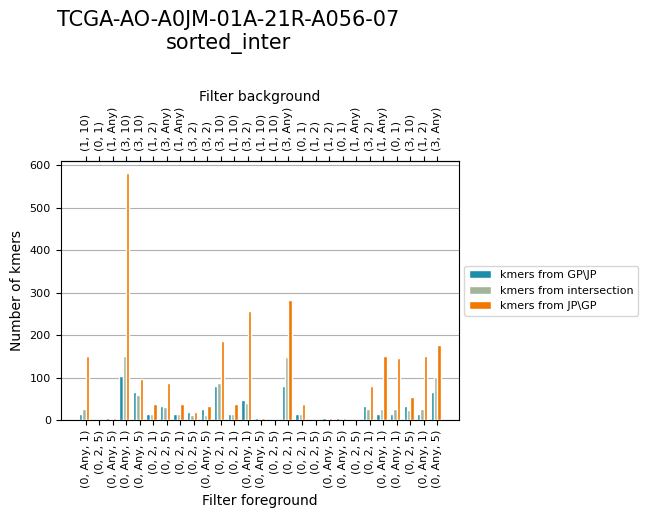

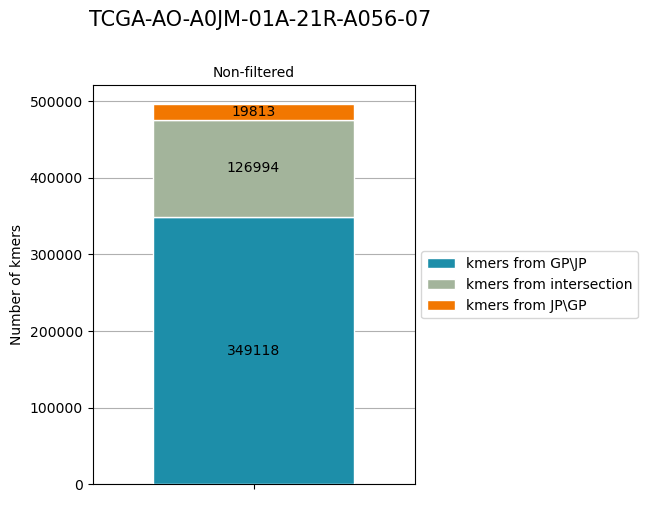

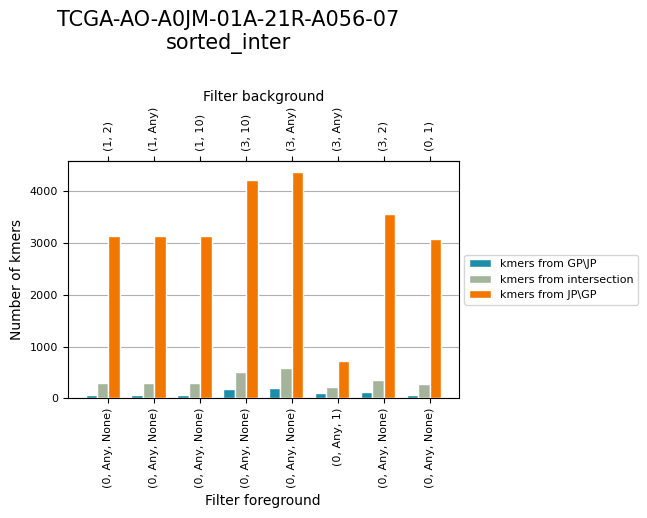

Choose right filter
Choose right filter


<Figure size 640x480 with 0 Axes>

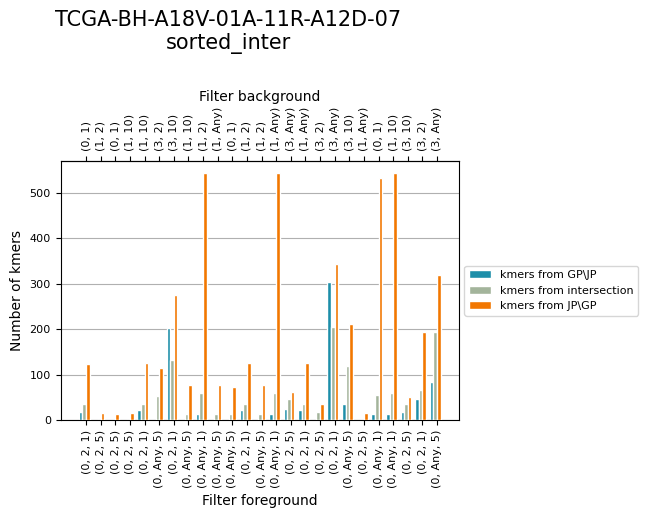

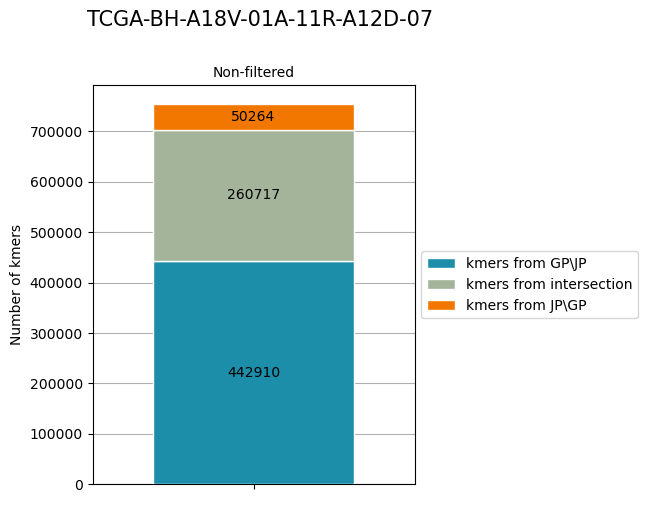

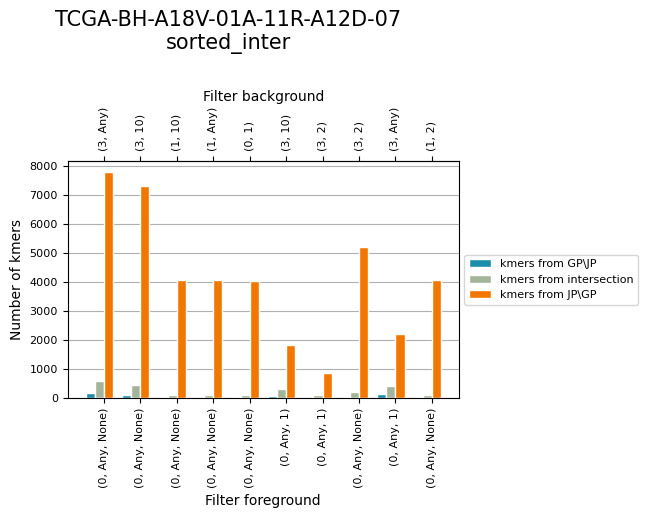

Choose right filter
Choose right filter


<Figure size 640x480 with 0 Axes>

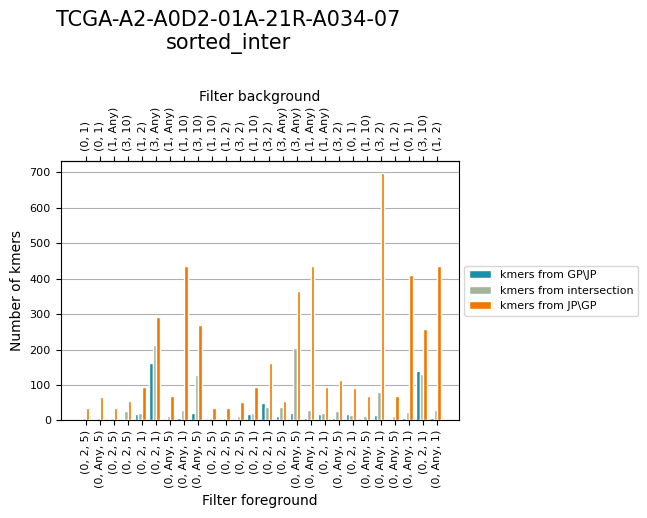

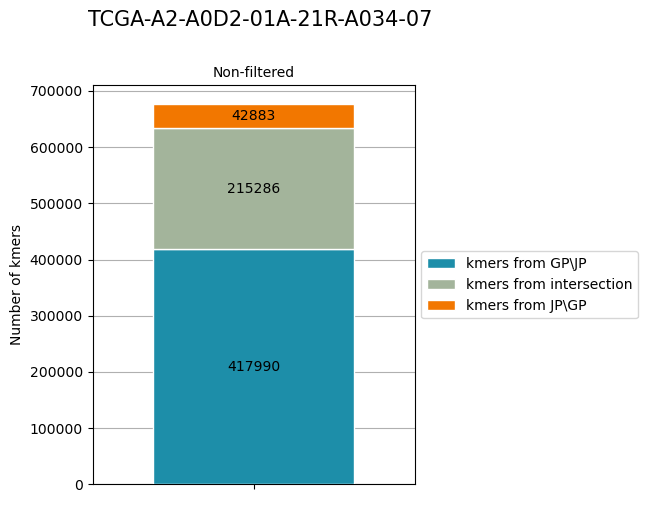

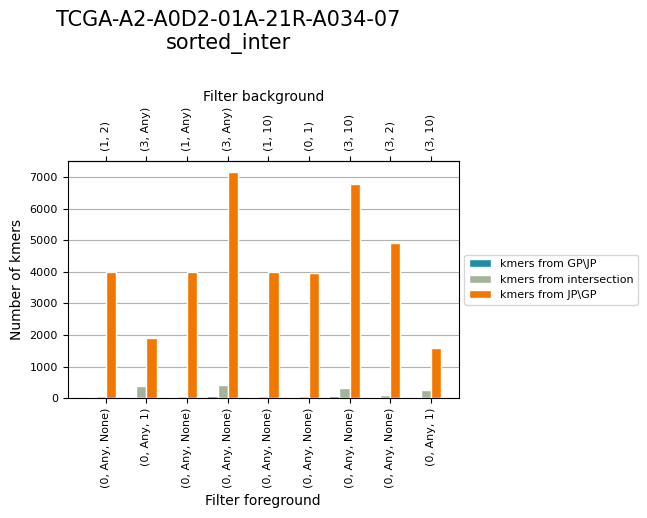

Choose right filter
Choose right filter


<Figure size 640x480 with 0 Axes>

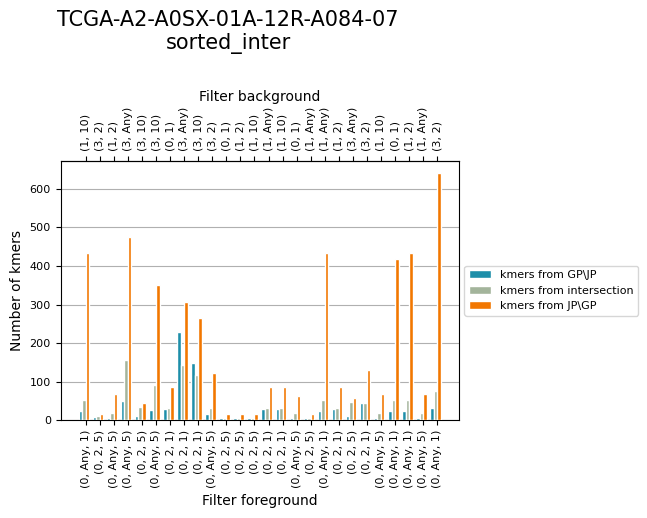

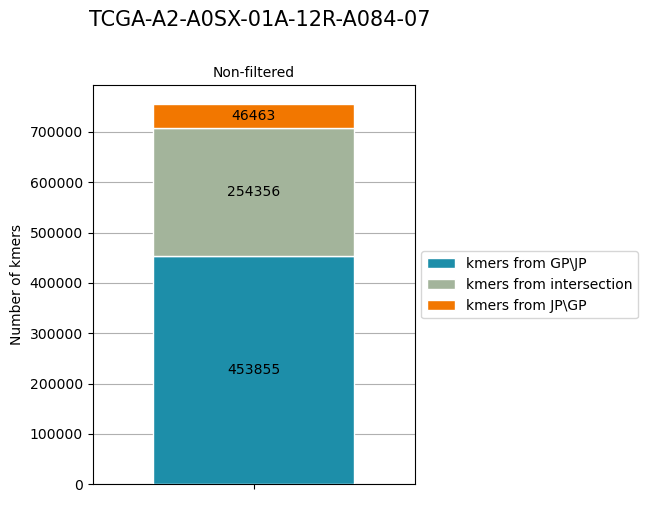

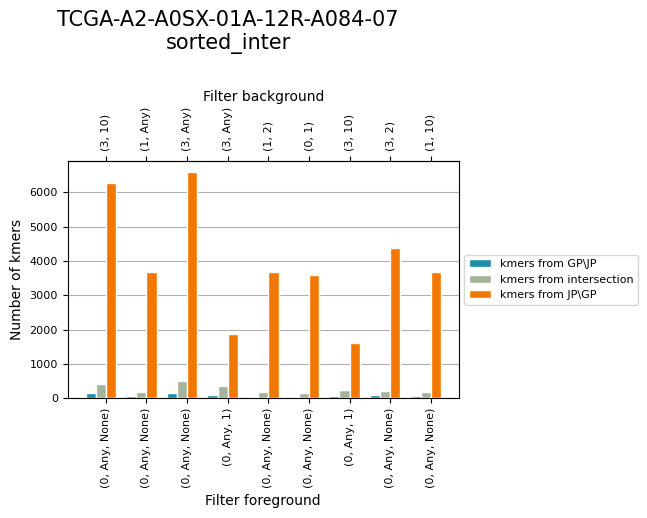

In [6]:
# Choose necessary data from tables and concatenate filtered & non-filtered cleared tables in one format.

out_df_original.rename(columns={'inter':'size_intersection',
                                'eth_without_ohsu':'size_eth\ohsu',
                                'ohsu_without_eth':'size_ohsu\eth'},inplace=True)
first_df=out_df_filtered
second_df=out_df_original
    
final_df = first_df

if not OHSU_BRCA_NEW:
    final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,NAME_FINAL_BRCA])
elif OHSU_BRCA_NEW:
    final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,'OHSU_BRCA_NEW',NAME_FINAL_BRCA])

final_df.to_csv(final_path,header=True,sep='\t')

# Processing data and drawing grahs for each sample
for sample in RESTRICTS_BRCA:
    
    # Download colums from tables
    data_df_first = final_df.loc[(final_df['sample']==sample)&(final_df['sum']<1000)]
    data_df_second = final_df.loc[(final_df['sample']==sample)&(final_df['sum']>=1000)]
    data_df_first=table_processing.sorting(data_df_first)
    data_df_second=table_processing.sorting(data_df_second)
    inter_first=list(data_df_first['size_intersection'])
    s_ETH_first=list(data_df_first['size_eth\ohsu'])
    s_OHSU_first=list(data_df_first['size_ohsu\eth'])
    
    inter_first=list(data_df_first['size_intersection'])
    s_ETH_first=list(data_df_first['size_eth\ohsu'])
    s_OHSU_first=list(data_df_first['size_ohsu\eth'])
    
    filter_foreground_first = list(data_df_first['filter_foreground'])
    filter_background_first = list(data_df_first['filter_background'])
    
    inter2=list(second_df['size_intersection'].loc[(second_df['sample']==sample)])
    s_ETH2=list(second_df['size_eth\ohsu'].loc[(second_df['sample']==sample)])
    s_OHSU2=list(second_df['size_ohsu\eth'].loc[(second_df['sample']==sample)])
    filfor2 = ['']
    filbac2 = ['']

    inter_second=list(data_df_second['size_intersection'])
    s_ETH_second=list(data_df_second['size_eth\ohsu'])
    s_OHSU_second=list(data_df_second['size_ohsu\eth'])
    filter_foreground_second = list(data_df_second['filter_foreground'])
    filter_background_second = list(data_df_second['filter_background'])
    ySalt=''
    
    l=len(s_ETH_first)
    l3=len(s_ETH_second)
    filfor_first = table_processing.get_filter(filter_foreground_first, OHSU_BRCA_NEW)
    filbac_first = table_processing.get_filter(filter_background_first, OHSU_BRCA_NEW)
    filfor_second = table_processing.get_filter(filter_foreground_second, OHSU_BRCA_NEW)
    filbac_second = table_processing.get_filter(filter_background_second, OHSU_BRCA_NEW)
        

    # Combining filters for graph indexing
    
    fffb_first=[]
    for i in range(len(filfor_first)):
          fffb_first.append(filfor_first[i]+' '+filbac_first[i])
       
    fffb2=[]
    for i in range(len(filfor2)):
          fffb2.append(filfor2[i]+' '+filbac2[i])

    fffb_second=[]
    for i in range(len(filfor_second)):
          fffb_second.append(filfor_second[i]+' '+filbac_second[i])

    
    # Frame structure building
    name = ['kmers from GP\JP', 'kmers from intersection', 'kmers from JP\GP']
    v_first=[s_ETH_first, inter_first, s_OHSU_first]
    v_second=[s_ETH_second, inter_second, s_OHSU_second]
    
    axis2 = {
            'kmers from GP\JP':s_ETH2,
            'kmers from intersection':inter2,
            'kmers from JP\GP':s_OHSU2
            }
    lg_first = len(filfor_first)
    lg2 = len(filfor2)
    lg_second = len(filfor_second)
    #Plotting sample data
    
    x_main = filfor_first
    x_secondary_first = filbac_first
    x_secondary2 = filbac2
    x_secondary_second = filbac_second
    
    plt.figure()

    bottom_first =np.zeros(lg_first)
    bottom2 =np.zeros(lg2)
    bottom_second =np.zeros(lg_second)
    bar_position_ETH_first = range(len(s_ETH_first))

    bar_position_ETH2 = range(len(axis2['kmers from GP\JP']))

    bar_position_ETH_second = range(len(s_ETH_second))

    SALT=salt=PLOT_SORT_BY
    
    path_sample_m1000 =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY_M1000+PNG])
    path_sample_l1000 =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY_L1000+PNG])
    path_sample_nf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY_NF+PNG])
    path_sample_m1000_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY_M1000+PDF])
    path_sample_l1000_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY_L1000+PDF])
    path_sample_nf_pdf =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY_NF+PDF])

    draw_plot.plotting_filtering_barplot(s_ETH_first,v_first,name,bottom_first,bar_position_ETH_first,sample,filfor_first,x_secondary_first,salt,path_sample_l1000,path_sample_l1000_pdf,coor=False)

    draw_plot.plotting_nf_barplot(axis2,fffb2,bottom2,sample,path_sample_nf,path_sample_nf_pdf,coor=False)
    # Plot 3

    draw_plot.plotting_filtering_barplot(s_ETH_second,v_second,name,bottom_second,bar_position_ETH_second,sample,filfor_second,x_secondary_second,salt,path_sample_m1000,path_sample_m1000_pdf,coor=False)


<a name='5'></a>
## Plotting data with log10

Choose right filter
Choose right filter


<Figure size 640x480 with 0 Axes>

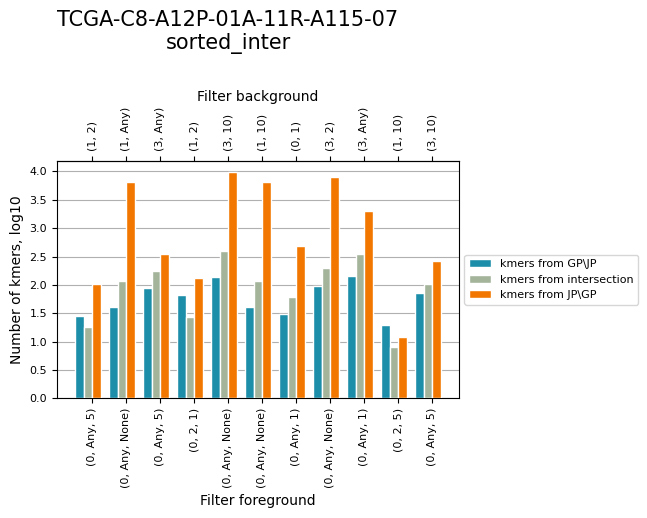

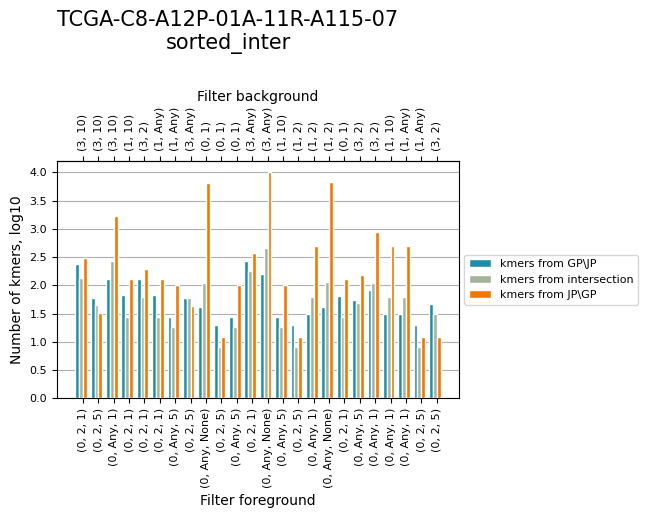

Choose right filter
Choose right filter


/cluster/customapps/biomed/grlab/users/prelotla/software/miniconda/envs/pep3/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

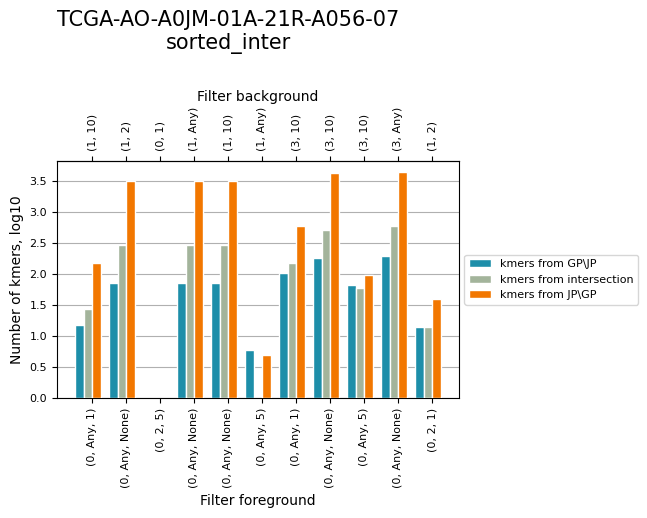

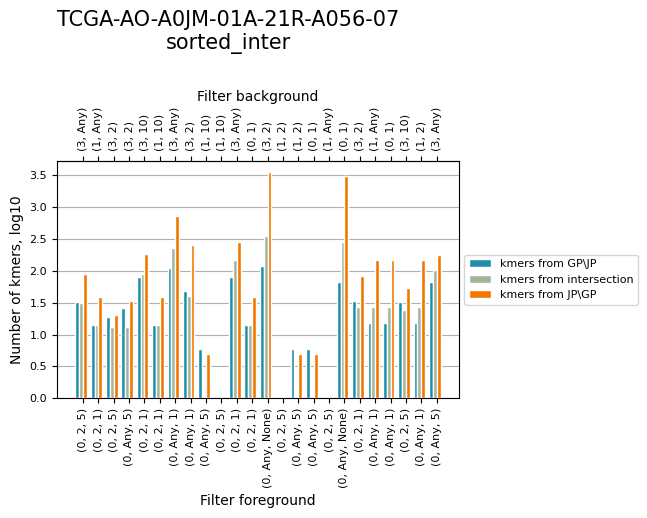

Choose right filter
Choose right filter


/cluster/customapps/biomed/grlab/users/prelotla/software/miniconda/envs/pep3/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

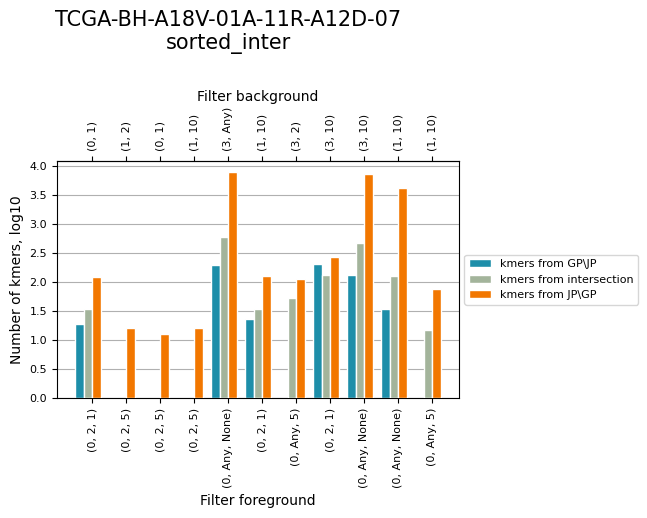

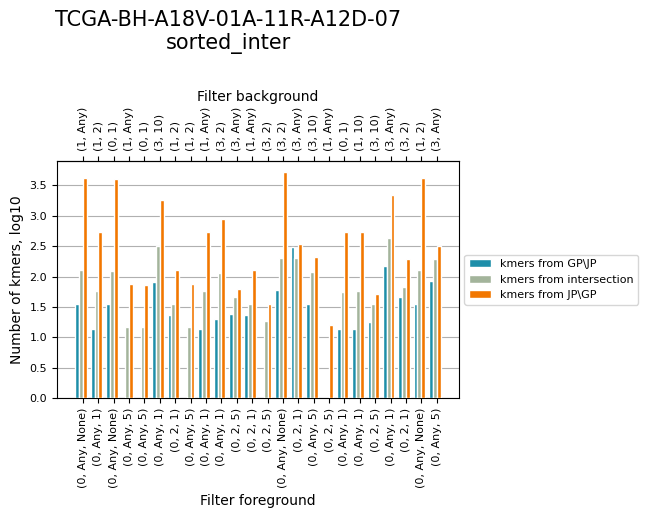

Choose right filter
Choose right filter


/cluster/customapps/biomed/grlab/users/prelotla/software/miniconda/envs/pep3/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 640x480 with 0 Axes>

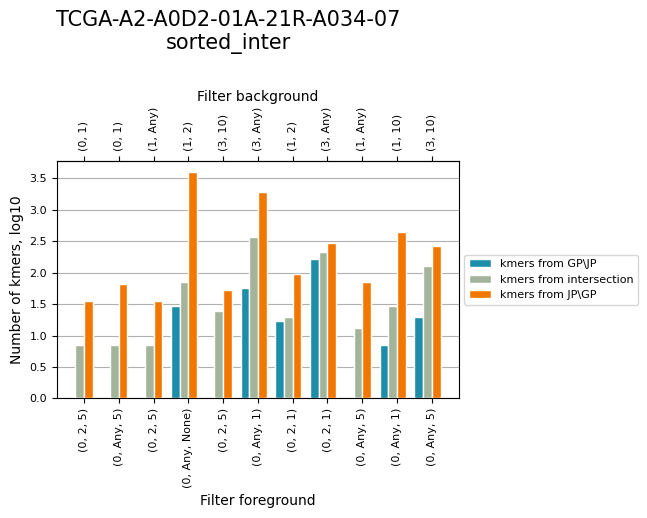

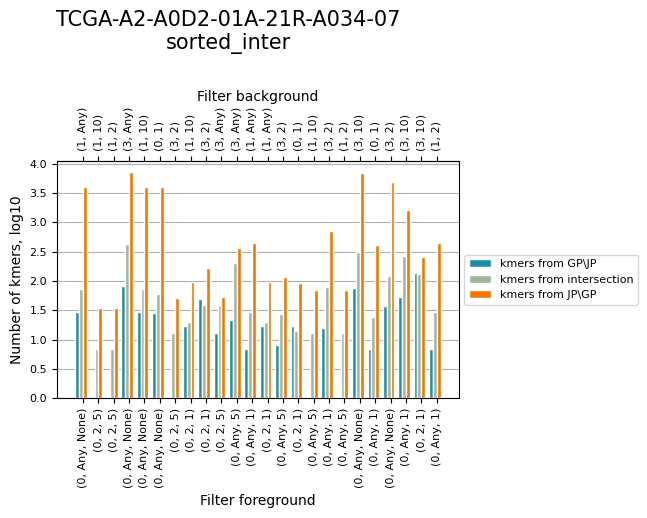

Choose right filter
Choose right filter


<Figure size 640x480 with 0 Axes>

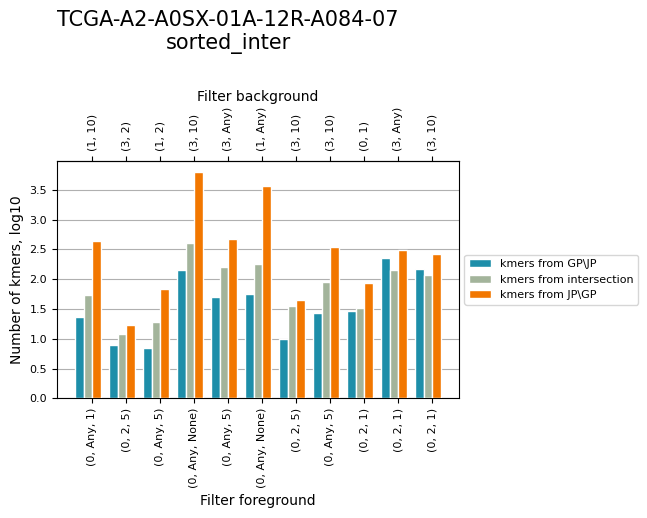

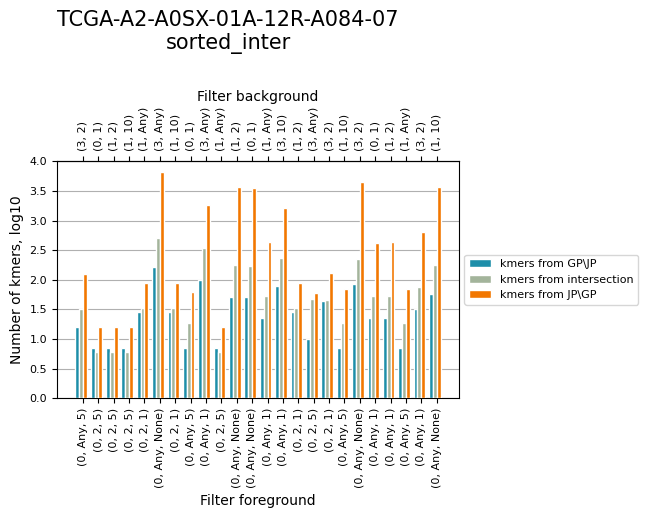

In [7]:
#WITH LOG
# Definition constants
import math
        
# Choose necessary data from tables and concatenate filtered & non-filtered cleared tables in one format.

out_df_original.rename(columns={'inter':'size_intersection',
                                'eth_without_ohsu':'size_eth\ohsu',
                                'ohsu_without_eth':'size_ohsu\eth'},inplace=True)
first_df=out_df_filtered
second_df=out_df_original
    
final_df = first_df

if not OHSU_BRCA_NEW:
    final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,NAME_FINAL_BRCA])
elif OHSU_BRCA_NEW:
    final_path = create_path.create_path(SAVE_DIR,[DIR_CSV,DIR_BRCA,NAME_TABLES,'OHSU_BRCA_NEW',NAME_FINAL_BRCA])

final_df.to_csv(final_path,header=True,sep='\t')

# Processing data and building plots for each sample
for sample in RESTRICTS_BRCA:
    
    # Download colums from tables
    final_df_new = final_df.loc[final_df['sample']==sample]
    
    data_df_first = final_df_new.iloc[:final_df_new['sample'].count()//3] # <
    data_df_second = final_df_new.iloc[final_df_new['sample'].count()//3:] # >
    
    data_df_first=table_processing.sorting(data_df_first)
    data_df_second=table_processing.sorting(data_df_second)
    inter_first=np.log10(data_df_first['size_intersection'])
    s_ETH_first=np.log10(data_df_first['size_eth\ohsu'])
    s_OHSU_first=np.log10(data_df_first['size_ohsu\eth'])
    
    filter_foreground_first = list(data_df_first['filter_foreground'])
    filter_background_first = list(data_df_first['filter_background'])


    inter_second=np.log10(data_df_second['size_intersection'])
    s_ETH_second=np.log10(data_df_second['size_eth\ohsu'])
    s_OHSU_second=np.log10(data_df_second['size_ohsu\eth'])
    filter_foreground_second = list(data_df_second['filter_foreground'])
    filter_background_second = list(data_df_second['filter_background'])
    ySalt=', log10'
    
    l=len(s_ETH_first)
    l3=len(s_ETH_second)
    filfor_first = table_processing.get_filter(filter_foreground_first, OHSU_BRCA_NEW)
    filbac_first = table_processing.get_filter(filter_background_first, OHSU_BRCA_NEW)
    filfor_second = table_processing.get_filter(filter_foreground_second, OHSU_BRCA_NEW)
    filbac_second = table_processing.get_filter(filter_background_second, OHSU_BRCA_NEW)
        

    # Combining filters for graph indexing
    
    fffb_first=[]
    for i in range(len(filfor_first)):
          fffb_first.append(filfor_first[i]+' '+filbac_first[i])
       
    fffb_second=[]
    for i in range(len(filfor_second)):
          fffb_second.append(filfor_second[i]+' '+filbac_second[i])

    
    # Frame structure building
    name = ['kmers from GP\JP', 'kmers from intersection', 'kmers from JP\GP']
    v_first=[s_ETH_first, inter_first, s_OHSU_first]
    v_second=[s_ETH_second, inter_second, s_OHSU_second]
    
    lg_first = len(filfor_first)
    lg_second = len(filfor_second)
    #Plotting sample data
    
    x_main = filfor_first
    x_secondary_first = filbac_first
    x_secondary_second = filbac_second
    
    plt.figure()

    bottom_first =np.zeros(lg_first)
    bottom_second =np.zeros(lg_second)
    bar_width=0.5
    
    bar_position_ETH_first = range(len(s_ETH_first))
    bar_position_ETH_second = range(len(s_ETH_second))

    SALT=salt=PLOT_SORT_BY
    
    path_sample_m1000_log =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, LOGTHM, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY_M1000+PNG])
    path_sample_l1000_log =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, LOGTHM, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY_L1000+PNG])
    path_sample_m1000_pdf_log =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, LOGTHM, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY_M1000+PDF])
    path_sample_l1000_pdf_log =create_path.create_path(SAVE_DIR, [DIR_CSV,DIR_BRCA,NAME_SAMPLES,'OHSU_BRCA_NEW', SALT,'kmers',PLOT_TYPE, LOGTHM, sample + '_' + NAME_PLOT_ABSOLUT_PRETTY_L1000+PDF])
    
    draw_plot.plotting_filtering_barplot(s_ETH_first,v_first,name,bottom_first,bar_position_ETH_first,sample,filfor_first,x_secondary_first,salt,path_sample_l1000_log,path_sample_l1000_pdf_log,coor=False,ySalt=ySalt)

    # Plot 3

    draw_plot.plotting_filtering_barplot(s_ETH_second,v_second,name,bottom_second,bar_position_ETH_second,sample,filfor_second,x_secondary_second,salt,path_sample_m1000_log,path_sample_m1000_pdf_log,coor=False,ySalt=ySalt)


In [8]:
SALT

'sorted_inter'